In [7]:
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# from _utils import generate_hypersphere_points

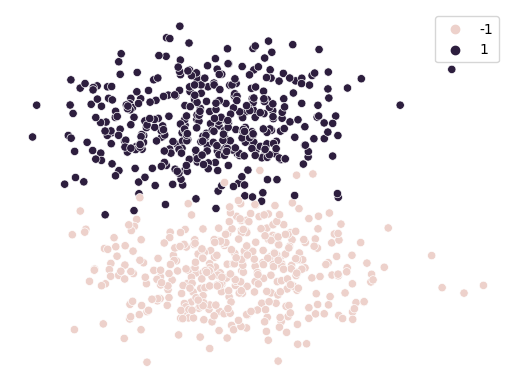

In [104]:
X,y = make_blobs(n_samples=800, n_features=2, centers=2)
# X = (X - np.mean(X))/np.std(X, axis = 0)
y = np.where(y == 0, -1,1)[:, np.newaxis]
sns.scatterplot(x =X[:,0],y = X[:,1], hue = y.ravel())
plt.axis('off')
plt.show()

## Some helper functions

In [105]:
def generate_random_weights(dim=3):
    '''generates random n-dim weight vector'''
    return np.random.normal(loc=0, scale=1, size=(dim,1))

# w1x1 + w2x2 + w0 = 0
def hyper_plane(w):
    '''plots a hyperplane for given weight vector'''
    slope = -w.ravel()[0]/w.ravel()[1]
    intercept = -w.ravel()[2]/w.ravel()[1]
    h_x = np.linspace(-5,5,100)
    h_y = (slope * h_x) + intercept
    plt.plot(h_x,h_y, color = 'r')

def show(X,y,w):
    '''plots the data points along with the seperator line'''
    sns.scatterplot(x =X[:,0],y = X[:,1], hue = y.ravel())
    plt.axis('off')
    hyper_plane(w)
    plt.title(f"Accuracy Percentage : {accuracy(X,y,w)}%")
    plt.show()

def accuracy(X,y,w):
    '''shows the percentage of correctly classified points'''
    X_new = np.insert(X,len(X[0]),1, axis = 1)
    hs = np.sign(X_new@w)
    return np.round(np.mean(hs==y)*100,2)


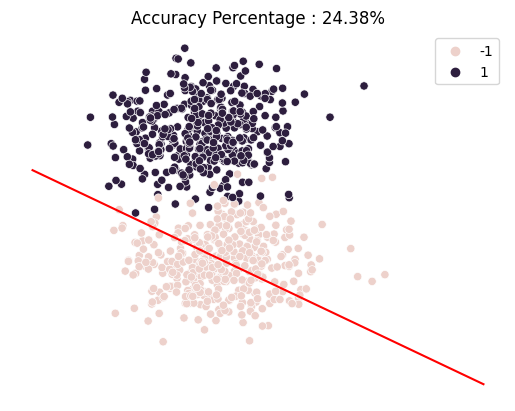

In [106]:
show(X,y,generate_random_weights(3))

- A random weight is generated which inturn results in a linear separator with 50% accuracy

## Steps for perceptron algorithm
1. Choose a random point from the dataset.
Alternatively, one could have looped over each data point but here we will use a random point.
2. Check whether that point is correctly classified by checking to which halfspace oof the hyperplane the point belongs to.
3. If miss-classified we will update the current weight:
`w = w + point*label`
4. Repeat till we reach the threshold accuracy or till the iterations are exhausted.(which ever comes first)

In [107]:
def perceptron_algorithm(X, y, w, iterations = 500, acc_threshold = 95):

    w_copy = np.copy(w)
    for iter in range(iterations):
        X_new = np.insert(X,X.shape[1],1,axis = 1)
        acc_perc = accuracy(X,y,w_copy)
        # setting a threshold for acceptable error percentage
        if acc_perc < acc_threshold:
            # choose index of a random point
            point_idx = np.random.choice(X_new.shape[0])
            # check halfspace of the point w.r.t hyperplane
            hs = np.sign(X_new[point_idx]@w_copy)
            # check whether the point is misclassified
            if hs != y[point_idx]:
                # update the weight vector of seperating hyperplane
                w_copy += (X_new[point_idx] * y[point_idx]).reshape(-1,1)
        else:
            break
        # show the plot for every 100th iteration
        if (iter+1)%100 == 0:
            print(f"Iteration -> {iter+1}")
            show(X,y,w_copy)
    print(f'Final Classifier (Finished in {iter + 1} iterations)')
    show(X,y,w_copy)
    return w_copy


Final Classifier (Finished in 9 iterations)


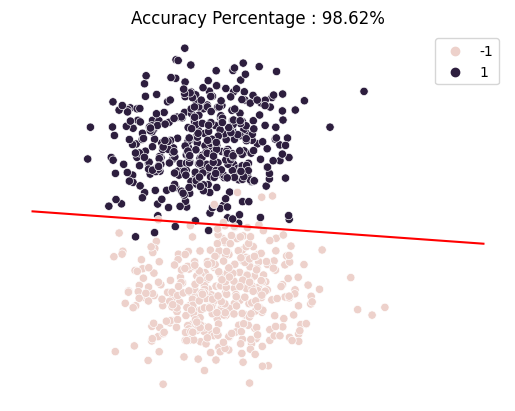

In [108]:
# generate a random weight vector of dimension 3
weight = generate_random_weights(3)
# running the algorithm to find the separator line for the two classes of data
final_weights = perceptron_algorithm(X,y,weight, iterations=500)

- Took 9 iterations to reach an accuracy of 98.62%

### Issues
- Taking one point at a time will be slow
### Solution
- We can take a batch of points (average of all miss-classified points together) and then update the weights

In [130]:
# updated algoritm
def perceptron_algorithm_updated(X, y, w, iterations = 500, acc_threshold = 95):
    w_copy = np.copy(w)
    for iter in range(iterations):
        X_new = np.insert(X,X.shape[1],1,axis = 1) # to include the w0 coeff in the weight vector itself
        acc_perc = accuracy(X,y,w_copy)
        # setting a threshold for acceptable accuracy percentage
        if acc_perc < acc_threshold:
            # check halfspaces of all the points w.r.t hyperplane
            hs = np.sign(X_new@w_copy) # nX1 vector where n = no of data points
            # collecting the indices for misclassified points
            miss_indices_mask = (hs!=y).ravel() # an array of True and False
            # check whether any point(s) is/are miss-classified
            if np.any(miss_indices_mask):
                # update the weight vector
                w_copy += np.mean((X_new[miss_indices_mask] * y[miss_indices_mask]), axis = 0).reshape(-1,1)
        else:
            break
        # show the plot for every 100th iteration
        if (iter+1)%100 == 0:
            print(f"Iteration -> {iter+1}")
            show(X,y,w_copy)
    print(f'Final Classifier (Finished in {iter + 1} iterations)')
    show(X,y,w_copy)
    return w_copy


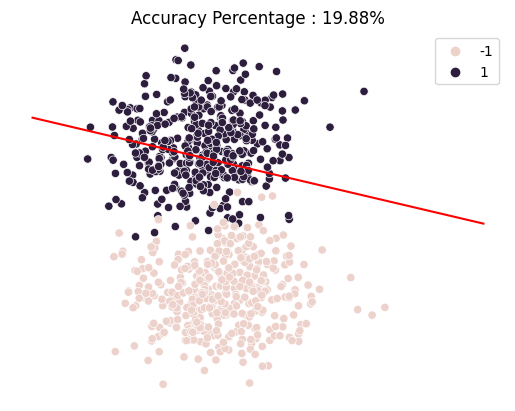

In [114]:
weight = generate_random_weights(3)
show(X,y,weight)

Iteration -> 1


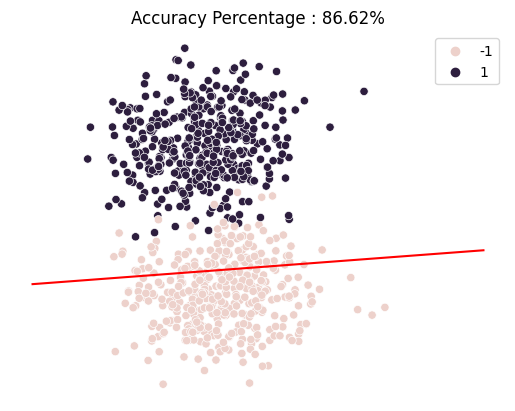

Final Classifier (Finished in 3 iterations)


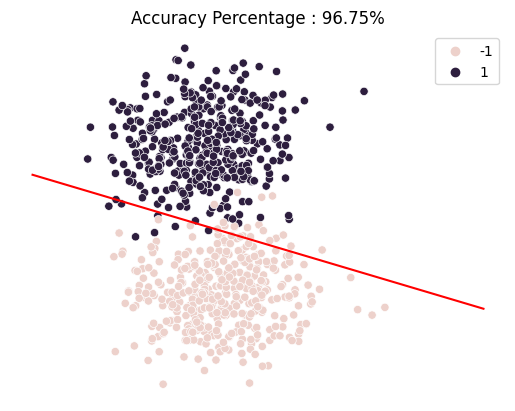

In [115]:
we = perceptron_algorithm_updated(X,y,weight)

## Comparing whether we received any advanteage using the updated algorithm

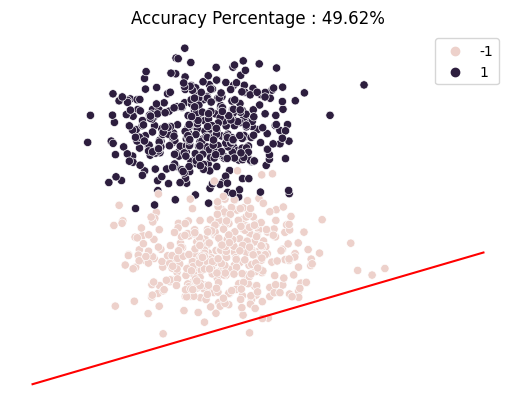

In [117]:
weight = generate_random_weights(3)
show(X,y,weight)

- Alomst random classiffer.
- Shoud be a good starting point

### Using our provious algoritm to see how many iterations it takes

In [124]:
weight

array([[ 0.07645013],
       [-0.17098248],
       [-0.63982605]])

Final Classifier (Finished in 18 iterations)


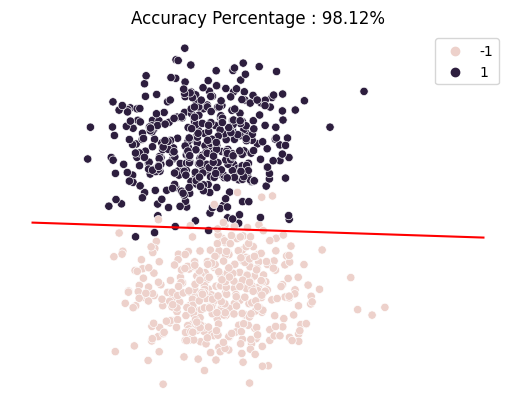

In [126]:
fin_w = perceptron_algorithm(X,y,weight)

- Took 18 iterations to reach 98.12% accuracy

In [127]:
# updated weight
fin_w

array([[ 0.15267011],
       [ 3.5374434 ],
       [-0.63982605]])

### Now using the updated algorithm with the same initial weights

In [128]:
weight

array([[ 0.07645013],
       [-0.17098248],
       [-0.63982605]])

Final Classifier (Finished in 3 iterations)


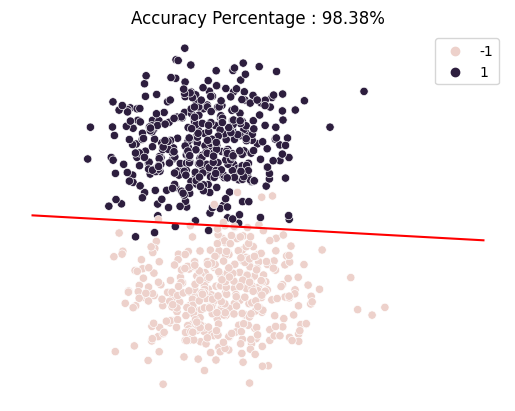

In [131]:
fin_w_updated = perceptron_algorithm_updated(X,y,weight)

- It took only 3 iteration to reach 98.38%
- We see a decrease in number of iterations